# Relevant Libraries

In [2]:
import pandas as pd               
import numpy as np               
import matplotlib.pyplot as plt   
import seaborn as sns             
sns.set()

# Importing Data

In [4]:
dataset_train=pd.read_csv("google_stock_price_details.csv")
train_set=dataset_train.iloc[:,1:2].values

Historical Stock Data of Google

Begining- January 2010

Ending- June 2020

In [5]:
dataset_train.head(5)  

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
1,2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2,2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
3,2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
4,2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900


In [6]:
dataset_train.tail(5)  

,Date,Open,High,Low,Close,Adj Close,Volume
2635,2020-06-23,1455.640015,1475.941040,1445.23999,1464.410034,1464.410034,1429800
2636,2020-06-24,1461.510010,1475.420044,1429.75000,1431.969971,1431.969971,1756000
2637,2020-06-25,1429.900024,1442.900024,1420.00000,1441.329956,1441.329956,1230500
2638,2020-06-26,1431.390015,1433.449951,1351.98999,1359.900024,1359.900024,4267700
2639,2020-06-29,1358.180054,1395.599976,1347.01001,1394.969971,1394.969971,1810200


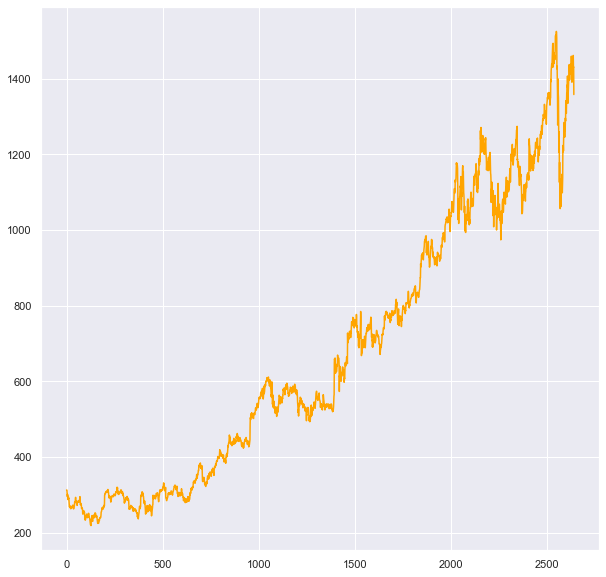

In [8]:
plt.figure(figsize=(10,10))         
plt.plot(dataset_train["Open"],color="orange") 
plt.show()

# Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
scaled_train_set=sc.fit_transform(train_set)

In case of Stocks it is preferred to implement Normalization and not Standardization

# Adding Memory of previous prices 

A special data structure is created which indicates at a particular time T the neural network will analyse the 60 previos stock prices

60 previous stock prices indicates all business days in last 3 months

Care must be taken to prevent overfitting

In [10]:
x_train=[]  
y_train=[]  

In [11]:
for i in range(60,2640):
    x_train.append(scaled_train_set[i-60:i,0])
    y_train.append(scaled_train_set[i,0])

In [12]:
x_train,y_train=np.array(x_train),np.array(y_train) 

# Reshaping

In [13]:
x_train.shape

(2580, 60)

In [14]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [15]:
x_train.shape

(2580, 60, 1)

There is only 1 indicator being used-Open Stock Price

# Importing Keras (Deep Learning)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Sequential - to create neural network object

Dense -fully connected layer

Dropout-to add dropout regularization to avoid overfitting

# Building Recurrent Neural Network

In [17]:
regressor = Sequential()   ##initialising rnn

# First LSTM layer

In [18]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))



return_sequences :

True - output something at each individual step

False- single vector output

# Second LSTM layer

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

dropout: rate of neurons to be ignored in each iteration

# Third LSTM layer

In [20]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Fourth LSTM layer

In [21]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Output Layer

In [22]:
regressor.add(Dense(units = 1))

LSTM -Long Short Term Memory

LSTM is required to prevent vanishing gradient problem

# Compilation

In [23]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

adam is a very powerful optimizer

rmsprop or adagrad can be also used

mean_squared error is used for regression

cross_entropy_loss is used in classification

# Fitting the Model

In [24]:
regressor.fit(x_train, y_train, epochs = 50, batch_size = 32) 

Epoch 1/50
81/81 [==============================] - 13s 162ms/step - loss: 0.0157
Epoch 2/50
81/81 [==============================] - 13s 159ms/step - loss: 0.0030
Epoch 3/50
81/81 [==============================] - 13s 160ms/step - loss: 0.0029
Epoch 4/50
81/81 [==============================] - 13s 160ms/step - loss: 0.0028
Epoch 5/50
81/81 [==============================] - 13s 158ms/step - loss: 0.0026
Epoch 6/50
81/81 [==============================] - 13s 160ms/step - loss: 0.0024
Epoch 7/50
81/81 [==============================] - 13s 159ms/step - loss: 0.0021
Epoch 8/50
81/81 [==============================] - 13s 160ms/step - loss: 0.0020
Epoch 9/50
81/81 [==============================] - 13s 159ms/step - loss: 0.0019
Epoch 10/50
81/81 [==============================] - 13s 159ms/step - loss: 0.0019
Epoch 11/50
81/81 [==============================] - 13s 160ms/step - loss: 0.0020
Epoch 12/50
81/81 [==============================] - 13s 159ms/step - loss: 0.0018
Epoch 13/50
8

32 weight updates per iteration

number of iterations is 50

# Test Data

In [25]:
dataset_test = pd.read_csv('july_20_google_price.csv') 
actual_price= dataset_test.iloc[:, 1:2].values

# Formatting Test Inputs

In [26]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)   

In [27]:
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Model Prediction

In [28]:
predicted_price = regressor.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)   

# Data Visualization

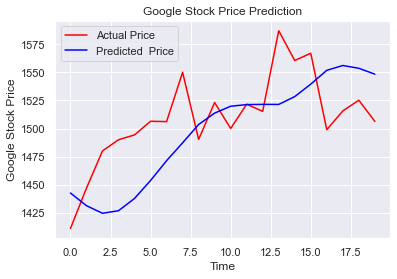

In [29]:
plt.plot(actual_price, color = 'red', label = 'Actual Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted  Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()